# ***THIS NOTEBOOK STUDIES A NEURAL NETWORK TRYING TO REPRODUCE THE GROUND STATE OF A HARMONIC OSCILLATOR AND PLOTS THE LOSS WITH RESPECT TO THE EPOCHS***
---
---
---
---
---



# IMPORTS AND GLOBAL VARIABLES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import integrate
from keras import layers, models, optimizers
import time
from __future__ import division
from scipy import interpolate
import math
from keras.callbacks import History


hbar = 1
omega = 1
m = 1
a = -5.
b = 5

Using TensorFlow backend.


# DATA GENERATION

In [4]:
#OPENING FILES
file1 = open("loss_moyen.txt", "w")
file2 = open("ecart-type_loss.txt", "w")
file3 = open("loss_total.txt","w")



############
#SECTION : CREATING THE TARGET
############

pts=1000                            #Number of points on the X and Y axis
linx = np.linspace (a,b,pts)        #X axis
h = 10/pts

#Computing the ground state of a harmonic oscillator
norm = np.zeros_like(linx, dtype=float)
x=a
for i in range(0,pts):
  norm[i] = pow(m*omega/(math.pi*hbar),0.25)*math.exp(-m*omega*(pow(x,2))/(2*hbar))
  x+=h







############
#SECTION : LOSS STUDY
############

runs = 30                                 #How many runs we want to compute a mean and a standard dev of the loss
nb_epochs = 100                           #How many epochs in each run
Loss = np.zeros((nb_epochs,runs))         #Loss array
array_epochs = np.arange(nb_epochs) + 1   #Epoch array

for k in range(0,runs):
  print('run n°',k+1)

  #INITIALIZATION OF NEURAL NETWORK
  model = models.Sequential([
      layers.Dense(200, input_shape=(1,), activation='relu'),
      layers.Dense(200, input_shape=(1,), activation='relu'),  
      layers.Dense(200, input_shape=(1,), activation='relu'),    
      layers.Dense(1), # no activation -> linear function of the input
  ])
  opt = optimizers.Adam(learning_rate=0.001)
  model.compile(loss='mse',optimizer=opt)
  history = History()
  hist = model.fit(linx, norm,batch_size=50, epochs=nb_epochs,callbacks=[history],verbose=0)
  predictions = model.predict(linx)
  preds = predictions.reshape(-1)


  #Writing the loss at each epoch
  for i in range(0,nb_epochs):
    Loss[i,k] = hist.history['loss'][i]



#Computing the mean
loss_moyen = np.sum(Loss,axis=1)/runs
#Computing the standard deviation
ecarttype = np.std(Loss,1)

#Writing data in files
np.savetxt(file1, loss_moyen, fmt='%.18e', delimiter=' ', newline='\n')
np.savetxt(file2, ecarttype, fmt='%.18e', delimiter=' ', newline='\n')
np.savetxt(file3,Loss, fmt='%.18e', delimiter=' ', newline ='\n')

file1.close()
file2.close()
file3.close()

run n° 1
run n° 2
run n° 3
run n° 4
run n° 5
run n° 6
run n° 7
run n° 8
run n° 9
run n° 10
run n° 11
run n° 12
run n° 13
run n° 14
run n° 15
run n° 16
run n° 17
run n° 18
run n° 19
run n° 20
run n° 21
run n° 22
run n° 23
run n° 24
run n° 25
run n° 26
run n° 27
run n° 28
run n° 29
run n° 30


# PLOT

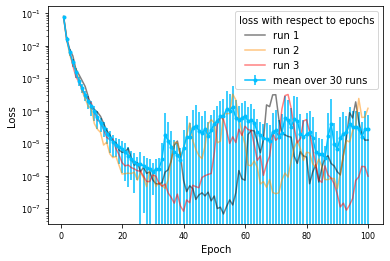

In [5]:
#opening files
loss_total = np.loadtxt("loss_total.txt", dtype=float, delimiter=' ')
loss_moyen = np.loadtxt("loss_moyen.txt", dtype=float, delimiter=' ')
ecarttype_loss = np.loadtxt("ecart-type_loss.txt", dtype=float, delimiter=' ')

#preparing 3 runs to plot on top of the mean values
loss_1 = np.reshape(loss_total[:,0],-1)
loss_2 = np.reshape(loss_total[:,1],-1)
loss_3 = np.reshape(loss_total[:,2],-1)

plt.yscale('log')
plt.errorbar(array_epochs,loss_moyen, yerr = ecarttype_loss,marker='.',c='deepskyblue',label = 'mean over 30 runs')
plt.plot(array_epochs,loss_1, c = 'k',alpha=0.5,label='run 1')
plt.plot(array_epochs,loss_2,c='darkorange',alpha=0.5,label='run 2')
plt.plot(array_epochs,loss_3,c='r',alpha=0.5,label='run 3')
plt.ylabel('Loss')
plt.xlabel("Epoch")
plt.legend(title = "loss with respect to epochs")
plt.tick_params(axis='both',labelsize='8')
plt.savefig('loss_epoch.pdf')